# Automatic Image Data Transitions via a Configurable Knowledge Graph

## `Image` Data Structure
``` typescript
interface ImageMetadata {
  colorChannel: 'rgb' | 'gbr' | 'grayscale';
  channelOrder: 'none' | 'channelFirst' | 'channelLast';
  isMiniBatched: boolean;
  intensityRange: '0-255' | '0-1';
  device: 'cpu' | 'gpu';
}

interface ISourceImage {
  dataType: string;
  value: any;
  metadata: ImageMetadata;
}

interface IDestinationImage {
  dataType: string;
  value: any;
  metadata: ImageMetadata[];
}

export type Image = ISourceImage | IDestinationImage;
```
The `Image` structure encapsulates digital image data and associated metadata, providing a comprehensive representation optimized for streamlined image processing, analysis, and storage.

**Attributes**:

- **dataType** (`str`): A string denoting the format of the image data. Examples include "numpy.ndarray" for scientific computing, and "torch.tensor" for machine learning tasks.

- **value** (`Any`): Holds the raw image data, compatible with the structure indicated by `dataType`.

- **metadata** (`Union[Dict, List[Dict]]`): Captures critical descriptors about the image. Depending on the image's usage(Source  vs. Destination), this can be a singular dictionary or a list of dictionaries.

  **Metadata Components**:

  - **colorChannel** (`str`): Specifies the color representation schema. Options include `rgb` (Red-Green-Blue), `gbr` (Green-Blue-Red), and `grayscale`.

  - **channelOrder** (`str`): Denotes the layout of color channels. Permissible values are `none` (no specific channel order), `channelFirst` (channels precede spatial dimensions), and `channelLast` (channels follow spatial dimensions).

  - **isMiniBatched** (`bool`): A flag indicating whether the image data is part of a batch.

  - **intensityRange** (`str`): Defines the pixel intensity spectrum. Common values are `0-255` (8-bit depth) and `0-1` (normalized).

  - **device** (`str`): Highlights the computational platform (e.g., `cpu` or `gpu`) where the image data resides and is primed for operations.

**Operational Context**:

- **Source Images (`src`)**: For original images, `metadata` is a singular dictionary encapsulating innate properties.

- **Destination Images (`dest`)**: For processed or derivative images, `metadata` is presented as `metadataList`, each dictionary in the list detailing a distinct processing stage or configuration.


In the context of visual programming, where data flow is typically represented in the form of nodes and connectors. Nodes essentially encapsulate functions, operations, or transformations. Inputs feed into these nodes, and after processing, the outputs emerge. This paradigm is particularly suitable for image processing workflows where an image undergoes a series of transformations.

**Example 1: Output of a Node in Visual Programming (Source Image)**
```
output_node_torchvision_read_image = {
    'dataType': 'torch.tensor',
    'value': torch.tensor([3, 20, 20], device='cpu'),
    'metadata': {
        'colorChannel': 'rgb',
        'channelOrder': 'channelFirst',
        'isMiniBatched': False,
        'intensityRange': '0-255',  # Assuming default 8-bit image, modify if different
        'device': 'cpu'  # Default device unless specified otherwise
    }
}
```
In this representation, the torchvision.io.read_image node has read an image file, and the output is a tensor with the RGB color space. The channels (RGB) come before the height and width dimensions (first), indicating the tensor's shape would be something like (3, height, width). The image isn't batched, and it's assumed to be on the CPU by default.

**Example 2: Input for the matplotlib.imshow Node in Visual Programming**
Given the specifications, the matplotlib.imshow node is flexible in accepting both RGB and grayscale images. Therefore, we'll create two metadata entries to cover both possibilities.
```
input_node_matplotlib_imshow = {
    'dataType': 'numpy.ndarray',
    'value': None,
    'metadata': [
        {
            'colorChannel': 'rgb',
            'channelOrder': 'channelLast',
            'isMiniBatched': False,
            'intensityRange': '0-255',
            'device': 'cpu'
        },
        {
            'colorChannel': 'grayscale',
            'channelOrder': 'none',  # No channels for grayscale
            'isMiniBatched': False,
            'intensityRange': '0-255',
            'device': 'cpu'
        }
    ]
}

```
In this representation, the `matplotlib.imshow` node anticipates an input image that is either RGB (with shape H x W x C) or grayscale (with shape H x W). Both images are based on the numpy array format and are expected to be non-batched, 8-bit images processed on the CPU.

This input representation can be used to validate or preprocess data before feeding it to the `matplotlib.imshow` node in the visual programming environment, ensuring compatibility and accurate visualization.

The `Image` structure you've described is a well-defined and versatile representation for image data in modern computational environments, particularly with the ongoing fusion of scientific computing, data analysis, and machine learning. Here's a succinct summary and analysis of the `Image` structure:


**Key Features**:
1. **Flexibility**: `Image` can accommodate different data formats such as numpy arrays and tensors, catering to varied computational requirements.
2. **Detailed Metadata**: The structure captures a wide range of metadata, from color space to computational platform, ensuring that the image data is interpretable and contextual.
3. **Operational Context**: Distinct metadata formats for source and destination images allow for clearer lineage and transformation tracking.

**Benefits**:
- **Interoperability**: With the `dataType` attribute, it becomes easier to work between scientific computing and machine learning environments.
- **Rich Context**: Comprehensive metadata provides critical details, making the image data self-descriptive. This is invaluable in pipelines where image provenance, transformation history, and computational context are crucial.
- **Streamlined Processing**: The inclusion of details like `device`, `isMiniBatched`, and `channelOrder` simplifies and optimizes image processing tasks, especially in machine learning workflows.

## **Knowledge Graph Paradigm**:
Deriving inspiration from formal computational theory, the knowledge graph is architected to facilitate the seamless transition between various nodes. 

- **Nodes (Datatypes)**: Each viable `dataType` as a unique node within the knowledge graph. Examples include "numpy.ndarray", "torch.tensor", and potentially others as the ecosystem evolves.

- **Edges (Transition Rules)**: Dictate the conversion pathway between two nodes. For example, the rule might define how to transition an image from a "numpy.ndarray" to a "torch.tensor".

- **Automated Conversion**: When leveraging a specific function or operation, users no longer need to delve into the intricacies of data conversion. The knowledge graph, with its rules, identifies the necessary transitions and executes them, ensuring the data is always in the correct state.

**Operational Benefits**:

- **Efficiency**: Automated transitio By abstracting the transition logic and automating it, this mechanism reduces cognitive overhead for researchers and practitioners, allowing them to focus on higher-order image processing tasks.ns eliminate the need for redundant manual conversions, saving time and computational resources.

- **Scalability**: The structure and associated knowledge graph can easily accommodate new data types or transition rules as they emerge in the fast-evolving image processing landscape.

- **Error Minimization**: By abstracting the conversion logic and embedding it within the knowledge graph, the chances of errors, inconsistencies, or oversights are substantially reduced.


## Transition Rules (Edges) in Knowledge Graph

### numpy.ndarray

#### numpy.ndarray to numpy.ndarray

In [1]:
def ndarray2ndarray(src_image, dest_metadata_list):
    import numpy as np
    image = np.copy(src_image["value"])
    if dest_metadata_list is None:
        return {
        "dataType": src_image["dataType"],
        "value": image,
        "metadata": src_image['metadata'],
    }
    def find_matched_color_channel(src_metadata, dest_metadata_list):
        # First, try matching the dataType
        for metadata in dest_metadata_list:
            if metadata["colorChannel"] == src_metadata["colorChannel"]:
                return metadata

        # Check for 'grb' or 'gbr' in src and match with 'rgb' or 'gbr' in dest
        if src_metadata["colorChannel"] in ["grb", "gbr"]:
            for metadata in dest_metadata_list:
                if metadata["colorChannel"] in ["rgb", "gbr"]:
                    return metadata

        # If no match found, return the first metadata
        return dest_metadata_list[0]

    src_metadata = src_image["metadata"]
    dest_metadata = find_matched_color_channel(src_metadata, dest_metadata_list)
    if src_metadata.get("isMiniBatched", False):
        batch_dim = 0
    else:
        batch_dim = None

    if (
        src_metadata["colorChannel"] == "grayscale"
        and dest_metadata["colorChannel"] == "grayscale"
    ):
        pass
    elif (
        src_metadata["colorChannel"] == "grayscale"
        and dest_metadata["colorChannel"] != "grayscale"
    ):
        if batch_dim is not None:
            image = np.repeat(image[..., np.newaxis], 3, axis=-1)
        else:
            image = np.repeat(image[:, :, np.newaxis], 3, axis=2)
    elif (
        src_metadata["colorChannel"] != "grayscale"
        and dest_metadata["colorChannel"] == "grayscale"
    ):
        if src_metadata["channelOrder"] == "hannelFirst":
            if batch_dim is None:
                if src_metadata["colorChannel"] == "rgb":
                    weights = np.array([0.299, 0.587, 0.114]).reshape(3, 1, 1)
                else:  # gbr
                    weights = np.array([0.587, 0.114, 0.299]).reshape(3, 1, 1)
                image = np.sum(image * weights, axis=0)
            else:
                if src_metadata["colorChannel"] == "rgb":
                    weights = np.array([0.299, 0.587, 0.114]).reshape(1, 3, 1, 1)
                else:
                    weights = np.array([0.587, 0.114, 0.299]).reshape(1, 3, 1, 1)
                image = np.sum(weights * weights, axis=1, keepdims=True)
        else:
            if batch_dim is not None:
                if src_metadata["colorChannel"] == "rgb":
                    image = np.dot(image[..., :3], [0.299, 0.587, 0.114])
                else:  # gbr
                    image = np.dot(image[..., :3], [0.587, 0.114, 0.299])
            else:
                if src_metadata["colorChannel"] == "rgb":
                    image = np.dot(image[:, :3], [0.299, 0.587, 0.114])
                else:
                    image = np.dot(image[:, :3], [0.587, 0.114, 0.299])

    elif src_metadata["colorChannel"] == "gbr" and dest_metadata["colorChannel"] == "rgb":
        if src_metadata["channelOrder"] == "channelLast":
            if batch_dim is not None:
                image = image[..., [2, 0, 1]]
            else:
                image = image[:, :, [2, 0, 1]]
        elif src_metadata["channelOrder"] == "channelFirst":
            if batch_dim is not None:
                image = image[:, [2, 0, 1], :, :]
            else:
                image = image[[2, 0, 1], :, :]

    elif src_metadata["colorChannel"] == "rgb" and dest_metadata["colorChannel"] == "gbr":
        if src_metadata["channelOrder"] == "channelLast":
            if batch_dim is not None:
                image = image[..., [1, 2, 0]]
            else:
                image = image[:, :, [1, 2, 0]]
        elif src_metadata["channelOrder"] == "channelFirst":
            if batch_dim is not None:
                image = image[:, [1, 2, 0], :, :]
            else:
                image = image[[1, 2, 0], :, :]

                # Adjust channel order
    if (
        src_metadata["channelOrder"] == "channelFirst"
        and dest_metadata["channelOrder"] == "channelLast"
    ):
        if batch_dim is not None:
            image = np.transpose(image, (batch_dim, 2, 3, 1))
        else:
            image = np.transpose(
                image, (1, 2, 0)
            )  # Transpose to (height, width, channels)

    if (
        src_metadata["channelOrder"] == "channelLast"
        and dest_metadata["channelOrder"] == "channelFirst"
    ):
        if batch_dim is not None:
            image = np.transpose(image, (batch_dim, 3, 1, 2))
        else:
            image = np.transpose(image, (2, 0, 1))

    # Adjust intensity range
    if (
        src_metadata["intensityRange"] == "0-255"
        and dest_metadata["intensityRange"] == "0-1"
    ):
        image = image / 255.0
    elif (
        src_metadata["intensityRange"] == "0-1"
        and dest_metadata["intensityRange"] == "0-255"
    ):
        image = (image * 255).astype(np.uint8)

    # Handle batched destination image with non-batched source image
    if dest_metadata.get("isMiniBatched", False) and not src_metadata.get(
        "isMiniBatched", False
    ):
        image = np.expand_dims(image, 0)
    elif not dest_metadata["isMiniBatched"] and src_metadata.get("isMiniBatched", False):
        image = np.squeeze(image)

    if dest_metadata["channelOrder"] == "none":
        if src_metadata["channelOrder"] == "channelFirst":
            image = image.squeeze()

    # Create destination image with new metadata and converted values
    dest_image = {
        "dataType": src_image["dataType"],
        "value": image,
        "metadata": dest_metadata,
    }

    return dest_image

In [2]:
import numpy as np
def test_rgb_to_None():
    H, W, C = 100, 100, 3
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (H, W, C), dtype=np.uint8),
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = None

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    assert (
        converted_image["value"].shape == (H, W, C)
    ), f"Expected {expected_shape}, but got {converted_image['value'].shape}"
    assert (
        converted_image["metadata"] == src_image['metadata']
    )
    assert np.allclose(src_image['value'], converted_image['value'])

    print("test_rgb_to_None PASSED")
    
def test_rgb_to_gbr():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8),
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "colorChannel": "gbr",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    expected_shape = (100, 100, 3)
    assert (
        converted_image["value"].shape == expected_shape
    ), f"Expected {expected_shape}, but got {converted_image['value'].shape}"
    assert (
        converted_image["metadata"]["colorChannel"] == "gbr"
    ), f"Expected color space 'gbr', but got {converted_image['metadata']['colorChannel']}"
    
    print("test_rgb_to_gbr PASSED")


def test_rgb_to_gbr_batched():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (5, 100, 100, 3), dtype=np.uint8),
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "dataType": "numpy.ndarray",
            "colorChannel": "gbr",
            "channelOrder": "channelLast",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    expected_shape = (5, 100, 100, 3)
    assert (
        converted_image["value"].shape == expected_shape
    ), f"Expected {expected_shape}, but got {converted_image['value'].shape}"
    assert (
        converted_image["metadata"]["colorChannel"] == "gbr"
    ), f"Expected color space 'gbr', but got {converted_image['metadata']['colorChannel']}"

    print("test_rgb_to_gbr_batched PASSED")


def test_intensity_conversion_0_1_to_0_255():
    # Define source image metadata
    src_metadata = {
        "colorChannel": "rgb",
        "channelOrder": "channelLast",
        "isMiniBatched": False,
        "intensityRange": "0-1",
        "device": "cpu",
    }

    # Create a random source image
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.rand(100, 100, 3),
        "metadata": src_metadata,
    }

    # Define destination metadata for intensity conversion
    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert the image
    converted_image = ndarray2ndarray(src_image, dest_metadata_list)
    expected_image = (src_image["value"] * 255).astype(np.uint8)
    assert np.allclose(
        converted_image["value"], expected_image
    ), "Intensity conversion not working"

    print("test_intensity_conversion_0_1_to_0_255 PASSED")


def test_channel_order_conversion():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8),
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    assert converted_image["value"].shape == (
        3,
        100,
        100,
    ), f"Expected (3, 100, 100), but got {converted_image['value'].shape}"
    assert (
        converted_image["metadata"]["channelOrder"] == "channelFirst"
    ), f"Expected channel order 'first', but got {converted_image['metadata']['channelOrder']}"

    print("test_channel_order_conversion PASSED")


def test_reverse_channel_order_conversion():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (3, 100, 100), dtype=np.uint8),
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",  # Source channel order is 'first'
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",  # Destination channel order is 'channelLast'
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    assert converted_image["value"].shape == (
        100,
        100,
        3,
    ), f"Expected (100, 100, 3), but got {converted_image['value'].shape}"
    print("test_reverse_channel_order_conversion PASSED")


def test_grayscale_to_rgb():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (100, 100), dtype=np.uint8),
        "metadata": {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    assert converted_image["value"].shape == (100, 100, 3), "Grayscale to RGB failed."
    print("Grayscale to RGB passed.")


def test_channel_order_and_isMiniBatched():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8),
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    assert converted_image["value"].shape == (
        1,
        3,
        100,
        100,
    ), f"Expected (1, 3, 100, 100), but got {converted_image['value'].shape}"
    assert (
        converted_image["metadata"]["channelOrder"] == "channelFirst"
    ), f"Expected channel order 'first', but got {converted_image['metadata']['channelOrder']}"
    assert converted_image["metadata"]["isMiniBatched"], "Expected isMiniBatched to be True"

    print("test_channel_order_and_isMiniBatched PASSED")


def test_non_batched_rgb_to_batched_rgb():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(
            0, 256, (100, 100, 3), dtype=np.uint8
        ),  # Non-batched RGB image
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,  # Source image is not batched
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": True,  # Destination image is batched
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    assert converted_image["value"].shape == (
        1,
        100,
        100,
        3,
    ), f"Expected (1, 100, 100, 3), but got {converted_image['value'].shape}"
    print("test_non_batched_rgb_to_batched_rgb PASSED")


def test_batched_grayscale_first_to_non_batched_no_channel_order():
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (1, 1, 100, 100), dtype=np.uint8),
        # Batched grayscale image with channel order 'first'
        "metadata": {
            "colorChannel": "grayscale",
            "channelOrder": "channelFirst",
            "isMiniBatched": True,  # Source image is batched
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",  # No specified channel order for destination image
            "isMiniBatched": False,  # Destination image is not batched
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    converted_image = ndarray2ndarray(src_image, dest_metadata_list)

    assert converted_image["value"].shape == (
        100,
        100,
    ), f"Expected (100, 100), but got {converted_image['value'].shape}"
    print("test_batched_grayscale_first_to_non_batched_no_channel_order PASSED")


def test_grayscale_to_rgb_and_grayscale():
    # 1*1*H*W
    src_metadata = {
        "colorChannel": "grayscale",
        "channelOrder": "channelFirst",
        "isMiniBatched": True,
        "intensityRange": "0-1",
    }

    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": True,
            "intensityRange": "0-1",
        },
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-1",
        },
    ]
    src_image_value = np.random.random((1, 1, 256, 256))
    src_image = {
        "dataType": "numpy.ndarray",
        "value": src_image_value,
        "metadata": src_metadata,
    }

    dest_image_grayscale = ndarray2ndarray(src_image, dest_metadata_list)

    assert dest_image_grayscale["metadata"]["colorChannel"] == "grayscale"
    assert dest_image_grayscale["metadata"]["channelOrder"] == "none"
    assert not dest_image_grayscale["metadata"]["isMiniBatched"]
    assert np.allclose(dest_image_grayscale["value"], src_image_value[0][0])
    print("test_batched_grayscale_first_to_more_then_one_metadatas PASSED")


def test_rgb_not_batched_channelfirst_gbr_batched_channellast():
    C, H, W = 3, 64, 64
    src_image = {
        "dataType": "numpy.ndarray",
        "value": np.random.randint(0, 256, (C, H, W), dtype=np.uint8),
        "metadata": {
            "colorChannel": "rgb",
            "isMiniBatched": False,
            "channelOrder": "channelFirst",
            "intensityRange": "0-255",
        },
    }

    dest_metadata_list = [
        {
            "colorChannel": "gbr",
            "isMiniBatched": True,
            "channelOrder": "channelLast",
            "intensityRange": "0-255",
        }
    ]

    dest_image = ndarray2ndarray(src_image, dest_metadata_list)
    assert dest_image["value"].shape == (1, H, W, C)

    # Check values by converting both to RGB format and ensuring they match
    expected_image = dest_image["value"][0]  # batch size 1
    expected_image = expected_image[..., [2, 0, 1]]  # Convert GBR to RGB
    expected_image = np.transpose(expected_image, (2, 0, 1))
    assert np.allclose(src_image["value"], expected_image)
    print("test_rgb_not_batched_channelfirst_gbr_batched_channellast PASSED")


def test_batched_channellast_rgb_to_not_batched_grayscale():
    """Test the conversion from RGB to grayscale for a non-batched image."""

    # Random RGB image with shape (1, height, width, channels)
    H, W = 10, 10
    src_value = np.random.randn(1, H, W, 3)

    src_image = {
        "dataType": "numpy.ndarray",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": True,
            "intensityRange": "0-255",
        },
    }

    # Destination metadata list
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert the image
    dest_image = ndarray2ndarray(src_image, dest_metadata_list)

    weights = np.array([0.299, 0.587, 0.114])
    expected_value = (src_value * weights).sum(axis=-1)[0]  # Taking the first batch

    # Check if the converted numpy array matches the expected numpy array
    assert dest_image["value"].shape == (H, W)
    assert np.allclose(
        dest_image["value"], expected_value
    ), "Batched RGB to grayscale conversion failed."

    print("test_batched_channellast_rgb_to_not_batched_grayscale PASSED")


def test_batched_channelfirst_rgb_to_not_batched_grayscale():
    """Test the conversion from batched RGB (channel first) to non-batched grayscale for numpy arrays."""

    # Random batched RGB image with dimensions (batchsize, channels, height, width)
    H, W = 10, 10
    src_value = np.random.randn(5, 3, H, W)

    # Define source image and its metadata
    src_image = {
        "dataType": "numpy.ndarray",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": True,
            "intensityRange": "0-255",
        },
    }

    # Destination metadata list
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-255",
        }
    ]

    # Convert the image
    dest_image = ndarray2ndarray(src_image, dest_metadata_list)

    # Expected grayscale image computed using the formula
    weights = np.array([0.299, 0.587, 0.114])[:, None, None]
    expected_value = (src_value[0] * weights).sum(axis=0)  # Using the first batch

    # Check if the converted numpy array matches the expected numpy array
    assert dest_image["value"].shape == (H, W)
    assert np.allclose(
        dest_image["value"], expected_value
    ), "Batched (channel first) RGB to grayscale conversion failed."

    print("test_batched_channelfirst_rgb_to_not_batched_grayscale PASSED")

test_rgb_to_None()
test_rgb_to_gbr()
test_rgb_to_gbr_batched()
test_grayscale_to_rgb()
test_intensity_conversion_0_1_to_0_255()
test_channel_order_conversion()
test_channel_order_and_isMiniBatched()
test_reverse_channel_order_conversion()
test_non_batched_rgb_to_batched_rgb()
test_batched_grayscale_first_to_non_batched_no_channel_order()
test_grayscale_to_rgb_and_grayscale()
test_rgb_not_batched_channelfirst_gbr_batched_channellast()
test_batched_channellast_rgb_to_not_batched_grayscale()
test_batched_channellast_rgb_to_not_batched_grayscale()

test_rgb_to_None PASSED
test_rgb_to_gbr PASSED
test_rgb_to_gbr_batched PASSED
Grayscale to RGB passed.
test_intensity_conversion_0_1_to_0_255 PASSED
test_channel_order_conversion PASSED
test_channel_order_and_isMiniBatched PASSED
test_reverse_channel_order_conversion PASSED
test_non_batched_rgb_to_batched_rgb PASSED
test_batched_grayscale_first_to_non_batched_no_channel_order PASSED
test_batched_grayscale_first_to_more_then_one_metadatas PASSED
test_rgb_not_batched_channelfirst_gbr_batched_channellast PASSED
test_batched_channellast_rgb_to_not_batched_grayscale PASSED
test_batched_channellast_rgb_to_not_batched_grayscale PASSED


#### numpy.ndarray to torch.tensor

In [3]:
def ndarray2tensor(src_image):
  import torch
  torch_image = torch.tensor(src_image['value']).clone()
  return {
       'dataType': 'torch.tensor',
        'value': torch_image,
        'metadata': src_image['metadata']
  }

In [4]:
import torch
def test_ndarray_to_tensor():
    src_metadata = {
        "colorChannel": "rgb",
        "channelOrder": "channelFirst",
        "isMiniBatched": False,
        "intensityRange": "0-255",
    }

    src_image_value = np.random.random((3, 256, 256))
    src_image = {
        "dataType": "numpy.ndarray",
        "value": src_image_value,
        "metadata": src_metadata,
    }

    dest_image = ndarray2tensor(src_image)

    assert dest_image["metadata"] == src_metadata
    assert dest_image["dataType"] == 'torch.tensor'
    assert torch.equal(dest_image['value'], torch.tensor(src_image_value))
    print("test_numpy_to_tensor PASSED")

test_ndarray_to_tensor()

test_numpy_to_tensor PASSED


### torch.tensor

#### torch.tensor to torch.tensor

In [5]:
def tensor2tensor(src_image, dest_metadata_list):
    import torch
    image = src_image["value"].clone()
    if dest_metadata_list is None:
        return {
        "dataType": src_image["dataType"],
        "value": image,
        "metadata": src_image['metadata'],
    }
    
    def find_matched_color_channel(src_metadata, dest_metadata_list):
        # Same as the previous function, as this logic is independent of the data format
        for metadata in dest_metadata_list:
            if metadata["colorChannel"] == src_metadata["colorChannel"]:
                return metadata

        if src_metadata["colorChannel"] in ["grb", "gbr"]:
            for metadata in dest_metadata_list:
                if metadata["colorChannel"] in ["rgb", "gbr"]:
                    return metadata

        return dest_metadata_list[0]

    src_metadata = src_image["metadata"]
    dest_metadata = find_matched_color_channel(src_metadata, dest_metadata_list)

    # Handle batched images
    if src_metadata.get("isMiniBatched", False):
        batch_dim = 0
    else:
        batch_dim = None

    # Convert color space
    if (
        src_metadata["colorChannel"] == "grayscale"
        and dest_metadata["colorChannel"] == "grayscale"
    ):
        pass  # No need for conversion
    elif (
        src_metadata["colorChannel"] == "grayscale"
        and dest_metadata["colorChannel"] != "grayscale"
    ):
        image = image.unsqueeze(-1).repeat(1, 1, 1, 3)
    elif (
        src_metadata["colorChannel"] != "grayscale"
        and dest_metadata["colorChannel"] == "grayscale"
    ):
        if src_metadata["channelOrder"] == "channelFirst":
            if src_metadata["colorChannel"] == "rgb":
                weights = (
                    torch.tensor([0.299, 0.587, 0.114])
                    .unsqueeze(-1)
                    .unsqueeze(-1)
                    .to(image.device)
                )
            else:  # gbr
                weights = (
                    torch.tensor([0.587, 0.114, 0.299])
                    .unsqueeze(-1)
                    .unsqueeze(-1)
                    .to(image.device)
                )
            if batch_dim is not None:
                image = (image * weights).sum(dim=1)
            else:
                image = (image * weights).sum(dim=0)
        else:
            if src_metadata["colorChannel"] == "rgb":
                weights = torch.tensor([0.299, 0.587, 0.114]).to(image.device)
            else:  # gbr
                weights = torch.tensor([0.587, 0.114, 0.299]).to(image.device)
            if batch_dim is not None:
                image = (image * weights).sum(dim=3)
            else:
                image = (image * weights).sum(dim=2)

    elif src_metadata["colorChannel"] == "gbr" and dest_metadata["colorChannel"] == "rgb":
        if src_metadata["channelOrder"] == "channelLast":
            if batch_dim is not None:
                image = image[..., [2, 0, 1]]
            else:
                image = image[:, :, [2, 0, 1]]
        elif src_metadata["channelOrder"] == "channelFirst":
            if batch_dim is not None:
                image = image[:, [2, 0, 1], :, :]
            else:
                image = image[[2, 0, 1], :, :]

    elif src_metadata["colorChannel"] == "rgb" and dest_metadata["colorChannel"] == "gbr":
        if src_metadata["channelOrder"] == "channelLast":
            if batch_dim is not None:
                image = image[..., [1, 2, 0]]
            else:
                image = image[:, :, [1, 2, 0]]
        elif src_metadata["channelOrder"] == "channelFirst":
            if batch_dim is not None:
                image = image[:, [1, 2, 0], :, :]
            else:
                image = image[[1, 2, 0], :, :]

    # Adjust intensity range
    if (
        src_metadata["intensityRange"] == "0-255"
        and dest_metadata["intensityRange"] == "0-1"
    ):
        image = image.float() / 255.0
    elif (
        src_metadata["intensityRange"] == "0-1"
        and dest_metadata["intensityRange"] == "0-255"
    ):
        image = image * 255

    # Adjust channel order
    if (
        src_metadata["channelOrder"] == "channelFirst"
        and dest_metadata["channelOrder"] == "channelLast"
    ):
        if batch_dim is not None:
            image = image.permute(batch_dim, 2, 3, 1)
        else:
            image = image.permute(1, 2, 0)
    elif (
        src_metadata["channelOrder"] == "channelLast"
        and dest_metadata["channelOrder"] == "channelFirst"
    ):
        if batch_dim is not None:
            image = image.permute(batch_dim, 3, 1, 2)
        else:
            image = image.permute(2, 0, 1)

    # Handle batched destination image
    if dest_metadata.get("isMiniBatched", False) and not src_metadata.get(
        "isMiniBatched", False
    ):
        image = image.unsqueeze(0)
    elif not dest_metadata.get("isMiniBatched", False) and src_metadata.get(
        "isMiniBatched", False
    ):
        image = image.squeeze(0)

    if dest_metadata["channelOrder"] == "none":
        if src_metadata["channelOrder"] == "channelFirst":
            image = image.squeeze(0)

    # Create destination image with new metadata and converted values
    dest_image = {
        "dataType": src_image["dataType"],
        "value": image,
        "metadata": dest_metadata,
    }

    return dest_image

In [6]:
import torch


def assert_tensors_equal(tensor1, tensor2):
    """Utility function to check if two tensors are close in value."""
    assert torch.allclose(tensor1, tensor2), f"Expected: {tensor1}, but got: {tensor2}"


def test_rgb_to_None():
    H, W, C = 10, 10, 3
    src_value = torch.randn(H, W, C)

    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }
    dest_metadata_list = None

    result = tensor2tensor(src_image, dest_metadata_list)

    assert (
        result["value"].shape == (H, W, C)
    ), f"Expected {(H, W, C)}, but got {result['value'].shape}"
    assert (
        result["metadata"] == src_image['metadata']
    )
    assert_tensors_equal(result["value"], src_value)
    print("test_rgb_to_None PASSED")
    

def test_rgb_to_gbr():
    """Test the conversion from RGB to GBR for a non-batched image."""
    src_value = torch.randn(
        10, 10, 3
    )  # Random RGB image with shape (height, width, channels)

    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    dest_metadata_list = [
        {
            "colorChannel": "gbr",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    result = tensor2tensor(src_image, dest_metadata_list)

    expected_value = src_value.clone()[:, :, [1, 2, 0]]  # Expected GBR image
    assert_tensors_equal(result["value"], expected_value)
    print("test_rgb_to_gbr PASSED")


def test_rgb_to_gbr_batched():
    # Adjust the intensityRange here to '0-1'
    src_metadata = {
        "colorChannel": "rgb",
        "channelOrder": "channelFirst",
        "isMiniBatched": True,
        "intensityRange": "0-1",
    }

    src_image_value = torch.randn((1, 3, 12, 12))
    src_image = {
        "dataType": "torch.tensor",
        "value": src_image_value,
        "metadata": src_metadata,
    }
    dest_metadata_list = [
        {
            "colorChannel": "gbr",
            "channelOrder": "channelFirst",
            "isMiniBatched": False,
            "intensityRange": "0-1",
            "device": "cpu",
        }
    ]

    dest_image = tensor2tensor(src_image, dest_metadata_list)
    assert dest_image["value"].shape == (3, 12, 12)
    assert_tensors_equal(dest_image["value"][0], src_image_value[0, 1])  # G channel
    assert_tensors_equal(dest_image["value"][1], src_image_value[0, 2])  # B channel
    assert_tensors_equal(dest_image["value"][2], src_image_value[0, 0])  # R channel

    print("test_rgb_to_gbr_batched PASSED")


def test_channlelast_rgb_to_grayscale():
    """Test the conversion from RGB to grayscale for a non-batched image."""

    # Random RGB image with shape (height, width, channels)
    src_value = torch.randn(10, 10, 3)

    # Define source image and its metadata
    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    # Destination metadata list
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert the image
    result = tensor2tensor(src_image, dest_metadata_list)

    # Expected grayscale image computed using the formula
    weights = torch.tensor([0.299, 0.587, 0.114]).to(src_value.device)
    expected_value = (src_value * weights).sum(dim=-1)

    # Check if the converted tensor matches the expected tensor
    assert result["value"].shape == (10, 10)
    assert torch.allclose(
        result["value"], expected_value
    ), "RGB to grayscale conversion failed."

    print("test_channlelast_rgb_to_grayscale PASSED")


def test_channlefirst_rgb_to_grayscale():
    """Test the conversion from RGB to grayscale for a non-batched image."""

    # Random RGB image with shape (height, width, channels)
    src_value = torch.randn(3, 10, 10)

    # Define source image and its metadata
    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    # Destination metadata list
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert the image
    result = tensor2tensor(src_image, dest_metadata_list)

    # Expected grayscale image
    weights = (
        torch.tensor([0.299, 0.587, 0.114])
        .unsqueeze(-1)
        .unsqueeze(-1)
        .to(src_value.device)
    )
    expected_value = (src_value * weights).sum(dim=0)

    # Check if the converted tensor matches the expected tensor
    assert result["value"].shape == (10, 10)
    assert torch.allclose(
        result["value"], expected_value
    ), "Channel-first RGB to grayscale conversion failed."

    print("test_channlefirst_rgb_to_grayscale PASSED")


def test_batched_channellast_rgb_to_not_batched_grayscale():
    """Test the conversion from RGB to grayscale for a non-batched image."""

    # Random RGB image with shape (1, height, width, channels)
    src_value = torch.randn(1, 10, 10, 3)

    # Define source image and its metadata
    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    # Destination metadata list
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert the image
    result = tensor2tensor(src_image, dest_metadata_list)

    # Expected grayscale image computed using the formula
    weights = torch.tensor([0.299, 0.587, 0.114]).to(src_value.device)
    expected_value = (src_value * weights).sum(dim=-1)

    # Check if the converted tensor matches the expected tensor
    assert result["value"].shape == (10, 10)
    assert torch.allclose(
        result["value"], expected_value
    ), "RGB to grayscale conversion failed."

    print("test_batched_rgb_to_not_batched_grayscale PASSED")


def test_batched_channelfirst_rgb_to_not_batched_grayscale():
    """Test the conversion from RGB to grayscale for a non-batched image."""

    # Random RGB image with shape (1, height, width, channels)
    src_value = torch.randn(1, 3, 10, 10)

    # Define source image and its metadata
    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    # Destination metadata list
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert the image
    result = tensor2tensor(src_image, dest_metadata_list)

    # Expected grayscale image computed using the formula
    weights = (
        torch.tensor([0.299, 0.587, 0.114])
        .unsqueeze(-1)
        .unsqueeze(-1)
        .to(src_value.device)
    )
    expected_value = (src_value * weights).sum(dim=1).squeeze(0)

    # Check if the converted tensor matches the expected tensor
    assert result["value"].shape == (10, 10)
    assert torch.allclose(
        result["value"], expected_value
    ), "RGB to grayscale conversion failed."

    print("test_batched_rgb_to_not_batched_grayscale PASSED")


def test_intensity_conversion_0_1_to_0_255_rgb():
    """Test the intensity conversion from [0, 1] range to [0, 255] range for RGB images."""

    # Random RGB image with intensity values in [0, 1] range and shape (height, width, channels)
    src_value = torch.rand(10, 10, 3)

    # Define source image and its metadata
    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-1",
            "device": "cpu",
        },
    }

    # Destination metadata list
    dest_metadata_list = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert the image
    result = tensor2tensor(src_image, dest_metadata_list)

    # Expected RGB image with intensity values in [0, 255] range
    expected_value = src_value * 255

    # Check if the converted tensor matches the expected tensor
    assert torch.all(
        result["value"] == expected_value
    ), "Intensity conversion from [0, 1] to [0, 255] for RGB images failed."

    print("test_intensity_conversion_0_1_to_0_255_rgb PASSED")


def test_channel_order_conversion():
    """Test the channel order conversion between 'channelLast' and 'channelFirst'."""

    # Random RGB image with shape (height, width, channels)
    src_value_last_order = torch.randn(10, 10, 3)
    src_value_first_order = src_value_last_order.permute(
        2, 0, 1
    )  # Convert to first order

    # Define source images and their metadata
    src_image_last = {
        "dataType": "torch.tensor",
        "value": src_value_last_order,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    src_image_first = {
        "dataType": "torch.tensor",
        "value": src_value_first_order,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    # Destination metadata list for conversions
    dest_metadata_to_first = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    dest_metadata_to_last = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert images
    result_to_first = tensor2tensor(src_image_last, dest_metadata_to_first)
    result_to_last = tensor2tensor(src_image_first, dest_metadata_to_last)

    # Check conversions
    assert torch.all(
        result_to_first["value"] == src_value_first_order
    ), "Channel order conversion to 'first' failed."
    assert torch.all(
        result_to_last["value"] == src_value_last_order
    ), "Channel order conversion to 'last' failed."

    print("test_channel_order_conversion PASSED")


def test_batched_channel_order_conversion():
    """Test the channel order conversion with batched destination images."""

    # Random RGB image with shape (height, width, channels)
    src_value_last_order = torch.randn(10, 10, 3)
    src_value_first_order = src_value_last_order.permute(
        2, 0, 1
    )  # Convert to 'first' order

    # Define source images and their metadata
    src_image_last = {
        "dataType": "torch.tensor",
        "value": src_value_last_order,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    src_image_first = {
        "dataType": "torch.tensor",
        "value": src_value_first_order,
        "metadata": {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    # Destination metadata list for conversions
    dest_metadata_batched_to_first = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    dest_metadata_batched_to_last = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert images
    result_to_first = tensor2tensor(src_image_last, dest_metadata_batched_to_first)
    result_to_last = tensor2tensor(src_image_first, dest_metadata_batched_to_last)

    # Check conversions
    assert torch.all(
        result_to_first["value"][0] == src_value_first_order
    ), "Conversion to batched 'first' order failed."
    assert torch.all(
        result_to_last["value"][0] == src_value_last_order
    ), "Conversion to batched 'last' order failed."

    print("test_batched_channel_order_conversion PASSED")


def assert_tensors_equal(tensor1, tensor2):
    """Utility function to assert if two tensors are equal."""
    assert torch.all(tensor1 == tensor2), "Tensors are not equal."


def test_batched_grayscale_first_to_non_batched_no_channel_order():
    """Test the conversion from a batched, channels-first grayscale image to a non-batched, no channel order grayscale image."""

    # Random grayscale batched image with shape (batch, channels, height, width)
    src_value = torch.randn(1, 1, 10, 10)

    # Source image metadata
    src_metadata = {
        "colorChannel": "grayscale",
        "channelOrder": "channelFirst",
        "isMiniBatched": True,
        "intensityRange": "0-255",
        "device": "cpu",
    }

    # Destination metadata for a non-batched image with no channel order
    dest_metadata_list = [
        {
            "colorChannel": "grayscale",
            "channelOrder": "none",  # No channel order for the destination
            "isMiniBatched": False,  # Destination is non-batched
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Construct source image
    src_image = {
        "dataType": "torch.tensor",
        "value": src_value,
        "metadata": src_metadata,
    }

    # Convert using tensor2tensor
    result = tensor2tensor(src_image, dest_metadata_list)

    # Expected result: Remove the batch and channel dimensions
    expected_value = src_value[0, 0]

    # Check the conversion directly using the assert statement
    assert torch.all(
        result["value"] == expected_value
    ), "The converted tensor does not match the expected tensor."

    print("test_batched_grayscale_first_to_non_batched_no_channel_order PASSED")


def test_not_batched_gbr_to_batched_rgb_channelorder_conversion():
    """Test the GBR to RGB conversion with batched destination images."""

    # Random GBR image with shape (height, width, channels)
    src_value_last_order = torch.randn(10, 10, 3)
    src_value_first_order = src_value_last_order.permute(
        2, 0, 1
    )  # Convert to 'first' order

    # Define source images and their metadata for GBR color space
    src_image_last_gbr = {
        "dataType": "torch.tensor",
        "value": src_value_last_order,
        "metadata": {
            "colorChannel": "gbr",
            "channelOrder": "channelLast",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    src_image_first_gbr = {
        "dataType": "torch.tensor",
        "value": src_value_first_order,
        "metadata": {
            "colorChannel": "gbr",
            "channelOrder": "channelFirst",
            "isMiniBatched": False,
            "intensityRange": "0-255",
            "device": "cpu",
        },
    }

    # Destination metadata list for RGB conversions
    dest_metadata_batched_to_first_rgb = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelFirst",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    dest_metadata_batched_to_last_rgb = [
        {
            "colorChannel": "rgb",
            "channelOrder": "channelLast",
            "isMiniBatched": True,
            "intensityRange": "0-255",
            "device": "cpu",
        }
    ]

    # Convert images
    result_to_first_rgb = tensor2tensor(
        src_image_last_gbr,
        dest_metadata_batched_to_first_rgb,
    )
    result_to_last_rgb = tensor2tensor(
        src_image_first_gbr,
        dest_metadata_batched_to_last_rgb,
    )

    # Expected RGB values
    expected_value_first_rgb = (
        src_value_last_order[:, :, [2, 0, 1]].unsqueeze(0).permute(0, 3, 1, 2)
    )  # Convert GBR to RGB and add batch dimension
    expected_value_last_rgb = src_value_first_order.permute(1, 2, 0)[
        :, :, [2, 0, 1]
    ].unsqueeze(
        0
    )  # Convert GBR to RGB, add batch dimension

    # Check conversions
    assert torch.all(
        result_to_first_rgb["value"] == expected_value_first_rgb
    ), "Conversion to batched 'first' order failed."
    assert torch.all(
        result_to_last_rgb["value"] == expected_value_last_rgb
    ), "Conversion to batched 'last' order failed."

    print("test_not_batched_gbr_to_batched_rgb_channelorder_conversion PASSED")

test_rgb_to_None()
test_rgb_to_gbr()
test_rgb_to_gbr_batched()
test_channlelast_rgb_to_grayscale()
test_channlefirst_rgb_to_grayscale()
test_batched_channellast_rgb_to_not_batched_grayscale()
test_batched_channelfirst_rgb_to_not_batched_grayscale()
test_intensity_conversion_0_1_to_0_255_rgb()
test_channel_order_conversion()
test_batched_channel_order_conversion()
test_batched_grayscale_first_to_non_batched_no_channel_order()
test_not_batched_gbr_to_batched_rgb_channelorder_conversion()

test_rgb_to_None PASSED
test_rgb_to_gbr PASSED
test_rgb_to_gbr_batched PASSED
test_channlelast_rgb_to_grayscale PASSED
test_channlefirst_rgb_to_grayscale PASSED
test_batched_rgb_to_not_batched_grayscale PASSED
test_batched_rgb_to_not_batched_grayscale PASSED
test_intensity_conversion_0_1_to_0_255_rgb PASSED
test_channel_order_conversion PASSED
test_batched_channel_order_conversion PASSED
test_batched_grayscale_first_to_non_batched_no_channel_order PASSED
test_not_batched_gbr_to_batched_rgb_channelorder_conversion PASSED


#### torch.tensor to numpy.ndarray

In [7]:
def tensor2ndarray(src_image):
  import copy
  numpy_image = copy.deepcopy(src_image['value'].cpu().numpy())
  return {
       'dataType': 'numpy.ndarray',
       'value': numpy_image,
       'metadata': src_image['metadata']
  }

In [8]:
import torch
import numpy
def test_tensor_to_ndarray():
    src_metadata = {
        "colorChannel": "rgb",
        "channelOrder": "channelFirst",
        "isMiniBatched": False,
        "intensityRange": "0-255",
    }

    src_image_value = torch.randn(3, 256, 256)
    src_image = {
        "dataType": "",
        "value": src_image_value,
        "metadata": src_metadata,
    }

    dest_image = tensor2ndarray(src_image)

    assert dest_image["metadata"] == src_metadata
    assert dest_image["dataType"] == 'numpy.ndarray'
    assert numpy.array_equal(dest_image['value'], src_image_value.numpy())
    print("test_tensor_to_numpy PASSED")

test_tensor_to_ndarray()

test_tensor_to_numpy PASSED


## Unit test

### Unit test 1: **Image (torch.tensor, rgb, 0-255, (3, H, W)** to **Image (numpy.ndarray, gbr, 0-1, (1, H, W, 3))**


In [9]:
import numpy as np

def test_tensor_to_numpy_to_numpy():
    # RGB image of shape (3, H, W) with values between 0-255
    H, W = 64, 64
    src_image_value = torch.randint(0, 256, (3, H, W), dtype=torch.float32)
    src_image = {
        'dataType': 'torch.tensor',
        'value': src_image_value,
        'metadata': {
            'colorChannel': 'rgb',
            'isMiniBatched': False,
            'channelOrder': 'channelFirst',
            'intensityRange': '0-255'
        }
    }

    # GBR image of shape (1, H, W, 3) with values between 0-1
    dest_metadata_list = [{
        'colorChannel': 'gbr',
        'isMiniBatched': True,
        'channelOrder': 'channelLast',
        'intensityRange': '0-1'
    }]

    intermediate_numpy = tensor2ndarray(src_image)
    assert intermediate_numpy['dataType'] == 'numpy.ndarray'
    assert intermediate_numpy['metadata'] == src_image['metadata']
    assert intermediate_numpy['value'].shape == (3, H, W)
    assert np.allclose(intermediate_numpy['value'], src_image['value'].numpy())

    dest_image = ndarray2ndarray(intermediate_numpy, dest_metadata_list)

    assert dest_image['dataType'] == 'numpy.ndarray'
    assert dest_image['metadata'] == dest_metadata_list[0]
    assert dest_image['value'].shape == (1, H, W, 3)

    converted_numpy = dest_image['value'][0] # Batch size
    converted_numpy = converted_numpy[..., [2, 0, 1]]  # Convert GBR to RGB
    converted_numpy = np.transpose(converted_numpy, (2, 0, 1)) # Channdel order
    assert np.allclose(src_image_value / 255.0, converted_numpy)
    print("test_from_tensor_to_numpy_to_numpy PASSED")

test_tensor_to_numpy_to_numpy()

test_from_tensor_to_numpy_to_numpy PASSED


### Unit test 2:  **Image (numpy.ndarray, rgb, 0-1, (1, 3, H, W))** to **Image (torch.tensor, grayscale, 0-255, (H, W))**

In [10]:
import numpy as np
import torch

def test_numpy_to_tensor_to_tensor():
    # RGB image of shape (1, 3, H, W) with values between 0-1
    H, W = 64, 64
    src_image_value = np.random.rand(1, 3, H, W).astype(np.float32)
    src_image = {
        "dataType": "numpy.ndarray",
        "value": src_image_value,
        "metadata": {
            "colorChannel": "rgb",
            "isMiniBatched": True,
            "channelOrder": "channelFirst",
            "intensityRange": "0-1"
        }
    }

    # Grayscale image of shape (H, W) with values between 0-255
    dest_metadata_list = [{
        "colorChannel": "grayscale",
        "isMiniBatched": False,
        "channelOrder": "none",
        "intensityRange": "0-255"
    }]

    intermediate_image = ndarray2tensor(src_image)

    assert intermediate_image["dataType"] == "torch.tensor"
    assert intermediate_image["metadata"] == src_image['metadata']
    assert intermediate_image["value"].shape == (1, 3, H, W)
    assert np.array_equal(src_image["value"], intermediate_image["value"].numpy()), "Values in src_image and intermediate_image do not match!"


    dest_image = tensor2tensor(intermediate_image, dest_metadata_list)

    assert dest_image["dataType"] == "torch.tensor"
    assert dest_image["metadata"] == dest_metadata_list[0]
    assert dest_image["value"].shape == (H, W)
    weight = torch.tensor([0.299, 0.587, 0.114]).unsqueeze(-1).unsqueeze(-1)
    assert  torch.allclose(dest_image["value"], (intermediate_image["value"][0] * weight *255).sum(dim=0))

    print("test_numpy_to_tensor_to_tensor PASSED")

test_numpy_to_tensor_to_tensor()

test_numpy_to_tensor_to_tensor PASSED


## Knowledge Graph Configuration in Visual Programming

### Transitions rule configuration from numpy.ndarray to numpy.ndarray and numpy.ndarray to torch.tensor
``` json
{
  "imageTypeConversion": {
    "numpy.ndarray": {
      "numpy.ndarray": {
        "function_definition": "def ndarray2ndarray(src_image, dest_metadata_list):\n    import numpy as np\n    image = np.copy(src_image[\"value\"])\n    if dest_metadata_list is None:\n        return {\n        \"dataType\": src_image[\"dataType\"],\n        \"value\": image,\n        \"metadata\": src_image['metadata'],\n    }\n    def find_matched_color_channel(src_metadata, dest_metadata_list):\n        # First, try matching the dataType\n        for metadata in dest_metadata_list:\n            if metadata[\"colorChannel\"] == src_metadata[\"colorChannel\"]:\n                return metadata\n\n        # Check for 'grb' or 'gbr' in src and match with 'rgb' or 'gbr' in dest\n        if src_metadata[\"colorChannel\"] in [\"grb\", \"gbr\"]:\n            for metadata in dest_metadata_list:\n                if metadata[\"colorChannel\"] in [\"rgb\", \"gbr\"]:\n                    return metadata\n\n        # If no match found, return the first metadata\n        return dest_metadata_list[0]\n\n    src_metadata = src_image[\"metadata\"]\n    dest_metadata = find_matched_color_channel(src_metadata, dest_metadata_list)\n    if src_metadata.get(\"isMiniBatched\", False):\n        batch_dim = 0\n    else:\n        batch_dim = None\n\n    if (\n        src_metadata[\"colorChannel\"] == \"grayscale\"\n        and dest_metadata[\"colorChannel\"] == \"grayscale\"\n    ):\n        pass\n    elif (\n        src_metadata[\"colorChannel\"] == \"grayscale\"\n        and dest_metadata[\"colorChannel\"] != \"grayscale\"\n    ):\n        if batch_dim is not None:\n            image = np.repeat(image[..., np.newaxis], 3, axis=-1)\n        else:\n            image = np.repeat(image[:, :, np.newaxis], 3, axis=2)\n    elif (\n        src_metadata[\"colorChannel\"] != \"grayscale\"\n        and dest_metadata[\"colorChannel\"] == \"grayscale\"\n    ):\n        if src_metadata[\"channelOrder\"] == \"channelFirst\":\n            if batch_dim is None:\n                if src_metadata[\"colorChannel\"] == \"rgb\":\n                    weights = np.array([0.299, 0.587, 0.114]).reshape(3, 1, 1)\n                else:  # gbr\n                    weights = np.array([0.587, 0.114, 0.299]).reshape(3, 1, 1)\n                image = np.sum(image * weights, axis=0)\n            else:\n                if src_metadata[\"colorChannel\"] == \"rgb\":\n                    weights = np.array([0.299, 0.587, 0.114]).reshape(1, 3, 1, 1)\n                else:\n                    weights = np.array([0.587, 0.114, 0.299]).reshape(1, 3, 1, 1)\n                image = np.sum(weights * weights, axis=1, keepdims=True)\n        else:\n            if batch_dim is not None:\n                if src_metadata[\"colorChannel\"] == \"rgb\":\n                    image = np.dot(image[..., :3], [0.299, 0.587, 0.114])\n                else:  # gbr\n                    image = np.dot(image[..., :3], [0.587, 0.114, 0.299])\n            else:\n                if src_metadata[\"colorChannel\"] == \"rgb\":\n                    image = np.dot(image[:, :3], [0.299, 0.587, 0.114])\n                else:\n                    image = np.dot(image[:, :3], [0.587, 0.114, 0.299])\n\n    elif src_metadata[\"colorChannel\"] == \"gbr\" and dest_metadata[\"colorChannel\"] == \"rgb\":\n        if src_metadata[\"channelOrder\"] == \"channelLast\":\n            if batch_dim is not None:\n                image = image[..., [2, 0, 1]]\n            else:\n                image = image[:, :, [2, 0, 1]]\n        elif src_metadata[\"channelOrder\"] == \"channelFirst\":\n            if batch_dim is not None:\n                image = image[:, [2, 0, 1], :, :]\n            else:\n                image = image[[2, 0, 1], :, :]\n\n    elif src_metadata[\"colorChannel\"] == \"rgb\" and dest_metadata[\"colorChannel\"] == \"gbr\":\n        if src_metadata[\"channelOrder\"] == \"channelLast\":\n            if batch_dim is not None:\n                image = image[..., [1, 2, 0]]\n            else:\n                image = image[:, :, [1, 2, 0]]\n        elif src_metadata[\"channelOrder\"] == \"channelFirst\":\n            if batch_dim is not None:\n                image = image[:, [1, 2, 0], :, :]\n            else:\n                image = image[[1, 2, 0], :, :]\n\n                # Adjust channel order\n    if (\n        src_metadata[\"channelOrder\"] == \"channelFirst\"\n        and dest_metadata[\"channelOrder\"] == \"channelLast\"\n    ):\n        if batch_dim is not None:\n            image = np.transpose(image, (batch_dim, 2, 3, 1))\n        else:\n            image = np.transpose(\n                image, (1, 2, 0)\n            )  # Transpose to (height, width, channels)\n\n    if (\n        src_metadata[\"channelOrder\"] == \"channelLast\"\n        and dest_metadata[\"channelOrder\"] == \"channelFirst\"\n    ):\n        if batch_dim is not None:\n            image = np.transpose(image, (batch_dim, 3, 1, 2))\n        else:\n            image = np.transpose(image, (2, 0, 1))\n\n    # Adjust intensity range\n    if (\n        src_metadata[\"intensityRange\"] == \"0-255\"\n        and dest_metadata[\"intensityRange\"] == \"0-1\"\n    ):\n        image = image / 255.0\n    elif (\n        src_metadata[\"intensityRange\"] == \"0-1\"\n        and dest_metadata[\"intensityRange\"] == \"0-255\"\n    ):\n        image = (image * 255).astype(np.uint8)\n\n    # Handle batched destination image with non-batched source image\n    if dest_metadata.get(\"isMiniBatched\", False) and not src_metadata.get(\n        \"isMiniBatched\", False\n    ):\n        image = np.expand_dims(image, 0)\n    elif not dest_metadata[\"isMiniBatched\"] and src_metadata.get(\"isMiniBatched\", False):\n        image = np.squeeze(image)\n\n    if dest_metadata[\"channelOrder\"] == \"none\":\n        if src_metadata[\"channelOrder\"] == \"channelFirst\":\n            image = image.squeeze()\n\n    # Create destination image with new metadata and converted values\n    dest_image = {\n        \"dataType\": src_image[\"dataType\"],\n        \"value\": image,\n        \"metadata\": dest_metadata,\n    }\n\n    return dest_image",
        "function_name": "ndarray2ndarray"
      },
      "torch.tensor": {
        "function_definition": "def ndarray2tensor(src_image):\n  import torch\n  torch_image = torch.tensor(src_image['value']).clone()\n  return {\n       'dataType': 'torch.tensor',\n        'value': torch_image,\n        'metadata': src_image['metadata']\n  }",
        "function_name": "ndarray2tensor"
      }
    }
  }
}
```

### Node Definition
```json
    "read_image": {
      "type": "read_image",
      "category": "function",
      "title": "read_image",
      "tooltip": "Reads a JPEG or PNG image into a 3 dimensional RGB or grayscale Tensor. Optionally converts the image to the desired format. The values of the output tensor are uint8 in [0, 255].",
      "externalImports": "from torchvision import io\nfrom torchvision.io import ImageReadMode",
      "sourceCode": "{{indent}}{{{outputs.1}}} = io.read_image({{{inputs.1}}}, {{{inputs.2}}})\n{{indent}}{{{outputs.1}}} = {'value': {{{outputs.1}}}, 'dataType': 'torch.tensor', 'metadata': {'colorChannel': 'rgb', 'channelOrder': 'channelFirst', 'isMiniBatched': False, 'intensityRange': '0-255', 'device': 'cpu'}}\n{{{outputs.0}}}",
      "inputs": {
        "execIn": {
          "title": "execIn",
          "tooltip": "execIn",
          "dataType": "exec",
          "showWidget": false,
          "showTitle": false
        },
        "path": {
          "title": "path",
          "dataType": "string",
          "tooltip": "path(str) - path of the JPEG or PNG image."
        },
        "mode": {
          "title": "mode",
          "dataType": "imageio.ImageReadMode",
          "default": "ImageReadMode.UNCHANGED",
          "tooltip": "mode(ImageReadMode) - The read mode used for optionally converting the image. Default: ImageReadMode.UNCHANGED."
        }
      },
      "outputs": {
        "execOut": {
          "title": "execOut",
          "tooltip": "execOut",
          "dataType": "exec",
          "showWidget": false,
          "showTitle": false
        },
        "image": {
          "title": "image",
          "dataType": "image",
          "defaultValue": {
            "dataType": "torch.tensor"
          },
          "tooltip": "{dataType: torch.tensor, value, layout: [chw], colorMode: [rgb, grayscale], intensityRange: 0-255' device: cpu}"
        }
      }
    },
```

### Manual vs Image Data Transition in Visual Programming Environment

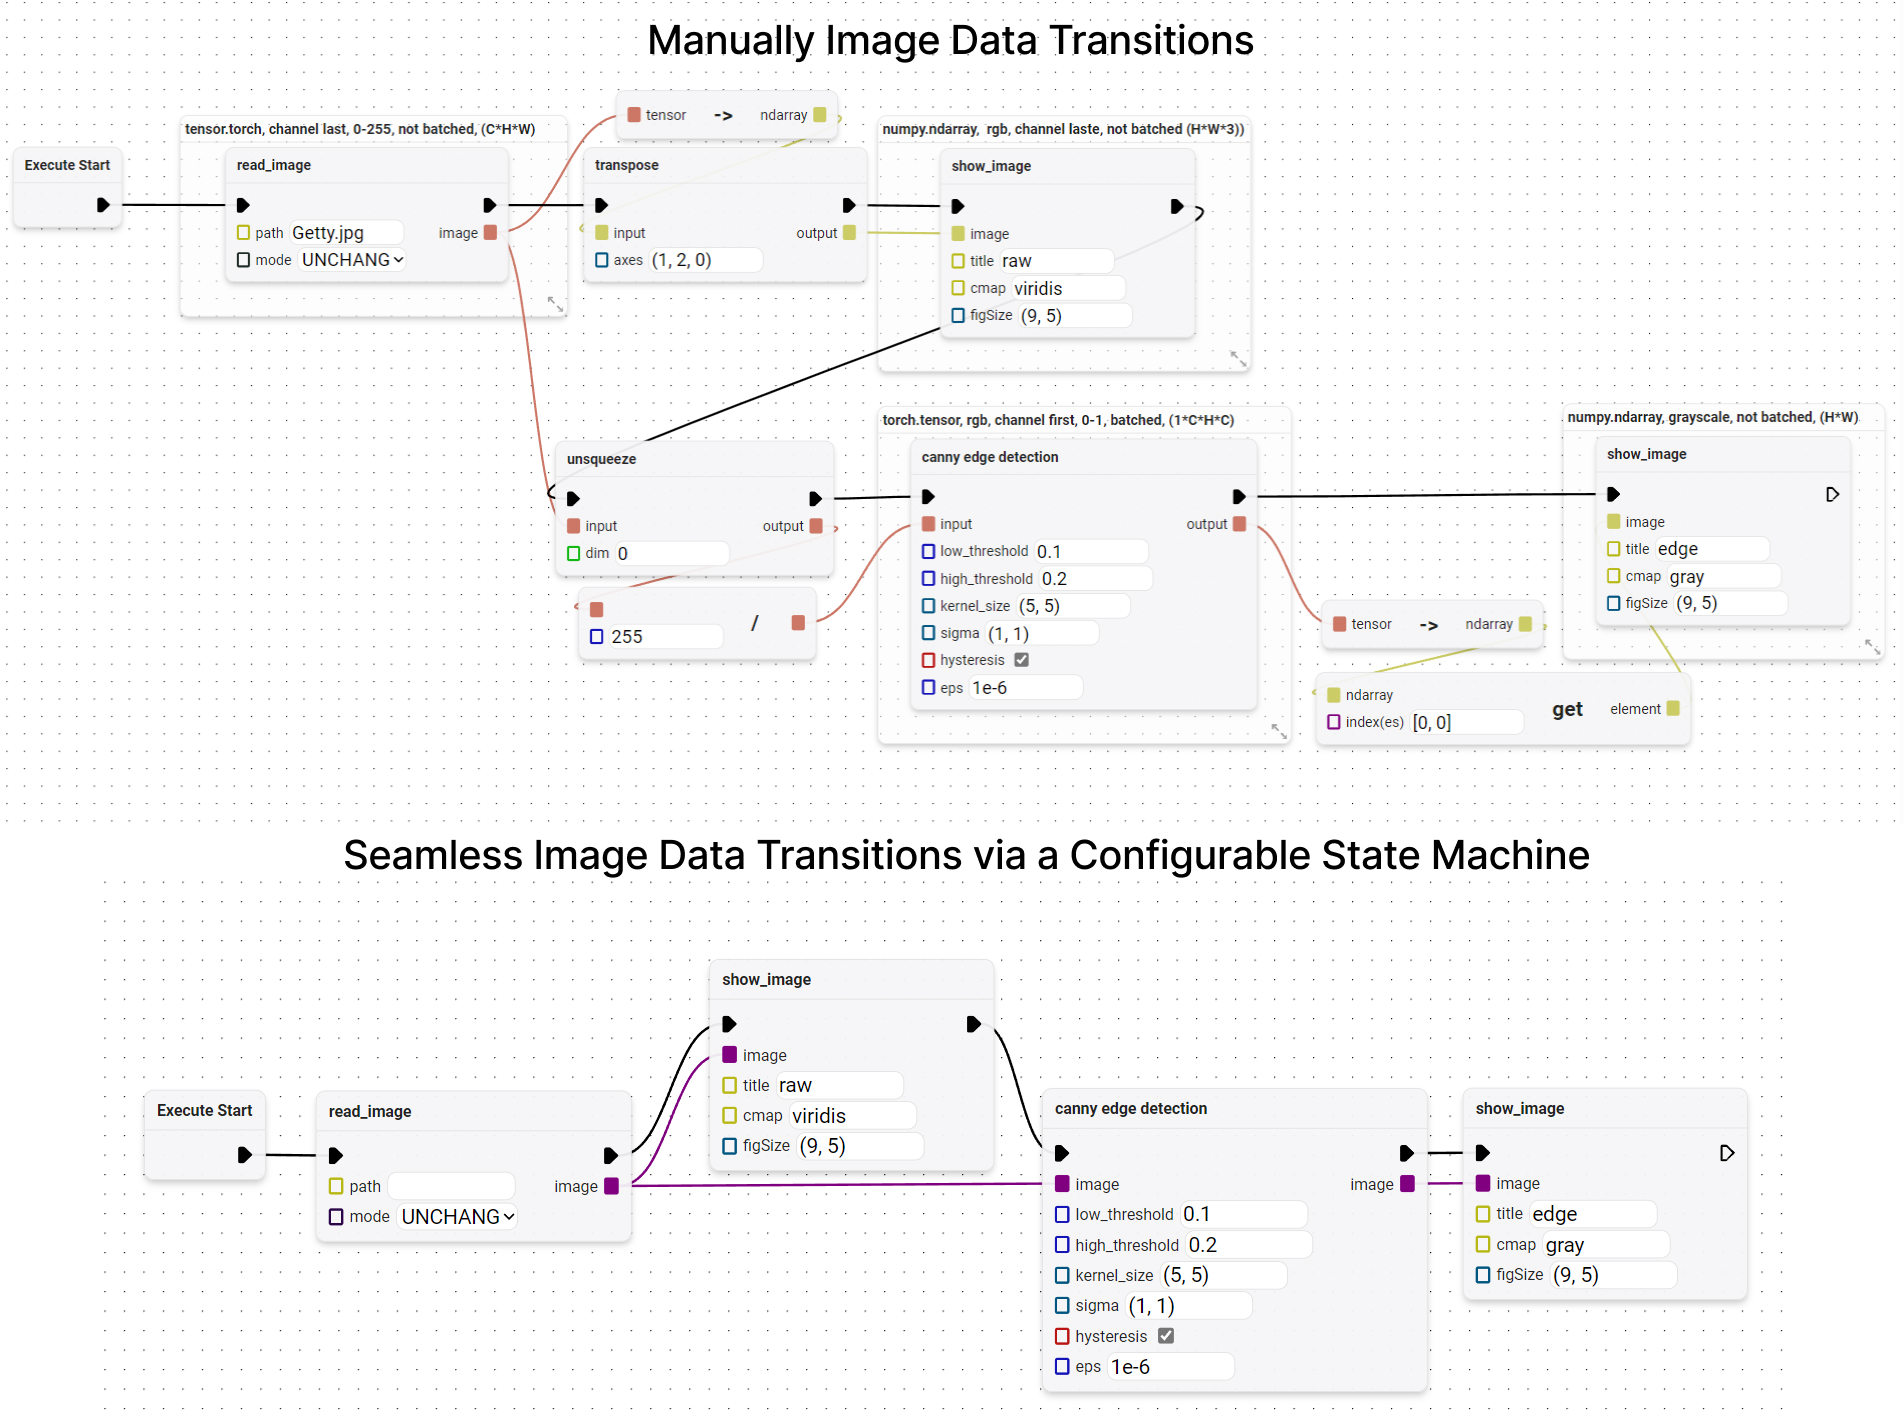

In [11]:
from IPython.display import Image
img = Image(filename='screenshots/Automatic_Image_Data_Transitions_via_a_Configurable_Knowledge_Graph.jpg')
display(img)